In [2]:
from util import setup_notebook
setup_notebook()
%load_ext autoreload
%autoreload 2

In [6]:
import os
import re
import altair as alt
import pandas as pd
from testmining import apfd, folders
from testmining.util import find_files

In [7]:
base_dir = os.path.join(folders.project('square@okhttp'), 'matrix-alpha')
file_regex = re.compile('square-okhttp-matrix-alpha-([.\d]+).csv')
files = find_files(base_dir, file_regex, converter=float)
df = pd.DataFrame(files, columns=['alpha', 'filename']).sort_values(by='alpha').reset_index(drop=True)
df

,alpha,filename
0,0.0,../output/square@okhttp/matrix-alpha/square-ok...
1,0.1,../output/square@okhttp/matrix-alpha/square-ok...
2,0.2,../output/square@okhttp/matrix-alpha/square-ok...
3,0.3,../output/square@okhttp/matrix-alpha/square-ok...
4,0.4,../output/square@okhttp/matrix-alpha/square-ok...
5,0.5,../output/square@okhttp/matrix-alpha/square-ok...
6,0.6,../output/square@okhttp/matrix-alpha/square-ok...
7,0.7,../output/square@okhttp/matrix-alpha/square-ok...
8,0.8,../output/square@okhttp/matrix-alpha/square-ok...
9,0.9,../output/square@okhttp/matrix-alpha/square-ok...


In [4]:
df['apfd'] = df['filename'].apply(apfd.file_apfd)
df

,alpha,filename,apfd
0,0.0,../output/square@okhttp/matrix-alpha/square-ok...,0.465961
1,0.1,../output/square@okhttp/matrix-alpha/square-ok...,0.465961
2,0.2,../output/square@okhttp/matrix-alpha/square-ok...,0.465961
3,0.3,../output/square@okhttp/matrix-alpha/square-ok...,0.465961
4,0.4,../output/square@okhttp/matrix-alpha/square-ok...,0.465961
5,0.5,../output/square@okhttp/matrix-alpha/square-ok...,0.728776
6,0.6,../output/square@okhttp/matrix-alpha/square-ok...,0.728776
7,0.7,../output/square@okhttp/matrix-alpha/square-ok...,0.728776
8,0.8,../output/square@okhttp/matrix-alpha/square-ok...,0.722743
9,0.9,../output/square@okhttp/matrix-alpha/square-ok...,0.712318


In [5]:
df['apfd'].idxmax()

5

/Users/falco/.local/share/virtualenvs/testmining-L_g6SVF2/lib/python3.6/site-packages/altair/utils/core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


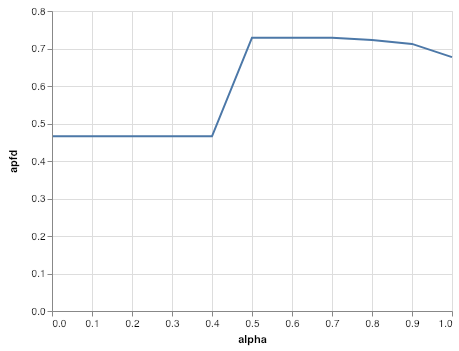

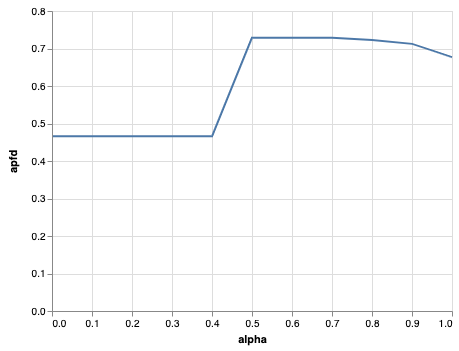

In [6]:
alt.Chart(df).mark_line().encode(
  x=alt.X('alpha'),
  y=alt.Y('apfd'),
)